## D213 Performance Assessment - Time Series Modeling

**Name:** Coots, Anthony.  
**Affiliation:** Grad Student M.Sc Data Analytics. <br />
**Date:** `2024-06-09`  
**Version:** 1.0.0, r0.

### Introduction

"As a data analyst, you will assess continuing data sources for their relevance to specific research questions throughout your career.

In your previous coursework, you performed data cleaning and exploratory data analysis on your data. You have seen basic trends and will now build more sophisticated statistical models.

For this task, you will select one of the data sets and associated data dictionaries from "[Data Files and Associated Dictionary Files](https://access.wgu.edu/ASP3/aap/content/f9ck5mr9dk4fcd054klw.html)" in the Web Links section.

After you choose your organizational data set, you will review the data dictionary and considerations related to the raw data file you have chosen and prepare the data for time series modeling. You will then analyze that data set using time series modeling, create visualizations, generate forecasts, and deliver the results of your analysis."

*- WGU*

### Competencies

4030.7.2 : Time Series Analysis
- The graduate applies time series models in generating forecasts.

<br /><br /><br /><br /><br /><br /><br /><br />

### Table of Contents:
- [Research Question](#Research-Question-H)
    - [Research Question](#Research-Question)
    - [Objectives or Goals](#Objectives-or-Goals)
- [Method Justification](#Method-Justification)
    - [Summary of Assumptions](#Summary-of-Assumptions)
- [Data Preparation](#Data-Preparation)
    - [Line Graph Visualization](#Line-Graph-Visualization)
    - [Time Step Formatting](#Time-Step-Formatting)
    - [Stationarity](#Stationarity)
    - [Steps to Prepare the Data](#Steps-to-Prepare-the-Data)
    - [Prepared Data Set](#Prepared-Data-Set)
- [Model Identification and Analysis](#Model-Identification-and-Analysis)
    - [Report Findings and Visualizations](#Report-Findings-and-Visualizations)
    - [ARIMA Model](#ARIMA-Model)
    - [Forecasting using ARIMA Model](#Forecasting-using-ARIMA-Model)
    - [Output and Calculations](#Output-and-Calculations)
    - [Code](#Code)
- [Data Summary and Implications](#Data-Summary-and-Implications)
    - [Results](#Results)
    - [Annotated Visualization](#Annotated-Visualization)
    - [Recommendation](#Recommendation)
- [Reporting](#Reporting)
    - [Sources for Third-Party Code](#Sources-for-Third--Party-Code)
    - [Sources](#Sources)

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Research Question<a name="Research-Question-H"></a>

### A1: Research Question <a name="Research-Question"></a>

*Summarize one research question relevant to a realistic organizational situation and can be addressed using the selected data set and time series modeling techniques*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The hospital(s) as presented in the data dictionary are challenged by hospital readmissions and their associated penalties. The penalties, are given by organizations like the '*Centers for Medicare and Medicaid Services (CMS)*.' Executives to the hospital are interested in the revenue trends during the hospital(s) initial years as assessment to the impact of patient readmission. ARIMA, also known as **A**uto**R**egressive **I**ntegrated **M**oving **A**verage, is a time series modeling technique that can help in visualizing and forecasting revenue trends to aid the executives in decision making related to mitigating patient readmission, the associated penalties and improve future financial outcomes. Further description of ARIMA can be found in *'Objectives or Goals.'*

Question: "*Can time series modeling techniques, such as ARIMA, effectively visualize and forecast the hospital's revenue over the initial years of operation*?"

### A2: Objectives or Goals <a name="Objectives-or-Goals"></a>

*Define each of the objectives or goals of the data analysis*.

Objectives/Goals:
- Visualize Revenue Trends:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The ARIMA model will be used against the daily revenue data to make visualizations that show trends over the first two years of operations.<br /><br />
- Forecast Future Revenue:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The ARIMA model will then be used to forecast future revenue trends based on the available data.<br /><br />
- Evaluate Model's Accuracy/Reliability:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The model will provide statistical metrics based on the model's accuracy and reliability with the data provided.<br /><br />
- Report Findings:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After visualizing and evaluating, reporting the findings or results aims to provide the hospital(s) executives with insight to better the financial outcomes for the hospital(s).

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Method Justification <a name="Method-Justification"></a>

### B1: Summary of Assumptions <a name="Summary-of-Assumptions"></a>

*Summarize each of the assumptions of a time series model, including stationarity and autocorrelated data*.

Assumptions:
- Stationarity:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first assumption of time series models including ARIMA is that the data must be stationary. This means that the statistical metrics such as mean and variance of the data is constant over time. For instance, the time series should have a consistent pattern with the change of time without being influenced by factors such as seasonality. If the time series is not stationary then it may need to be transformed from non-stationary to stationary.<br /><br />
- Autocorrelation:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next assumptionm for time series models like ARIMA is that the data showcases autocorrelation. Showing autocorrelation means that the values in the time series are correlated to the previous values. ARIMA works with this assumption in order to model and forecast values based on prior data.<br /><br />
- Linearity:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Building on the prior assumptions, ARIMA assumes that there is a linear relationship between the lagged observations (seen as *lags* in Python code) and the current observation in the data. This implies that the past data points/observations and future data points are constant with time, past, present and future.

<br /><br /><br /><br /><br /><br /><br /><br />

## Data Preparation <a name="Data-Preparation"></a>

### C1: Line Graph Visualization <a name="Line-Graph-Visualization"></a>

*Provide a line graph that is labeled and is a complete realization of the time series*.

In [361]:
# Import list.
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [362]:
# What is my current working directory?
print("\n\n Current Working Directory: " + os.getcwd() + '\n')



 Current Working Directory: C:\Users\antho\Desktop\School\WGU\M.S. Data Analytics\D213 - Advanced Data Analytics\Task 1 - Time Series Modeling



In [363]:
# Read data into DataFrame.
df = pd.read_csv("medical_time_series.csv")

In [364]:
# Identify the data types in the DataFrame, df.
print(df.dtypes)

Day          int64
Revenue    float64
dtype: object


In [365]:
# Convert to datetime.
df['Day'] = pd.to_datetime(
    df['Day'], 
    unit = 'D', 
    origin = pd.Timestamp('2021-12-31')
)
# The data dictionary does not provide a timeline, we'll make one!

In [366]:
# Set the days column as the index in the DataFrame.
df.set_index('Day', inplace = True)

In [367]:
df.isnull().sum()

Revenue    0
dtype: int64

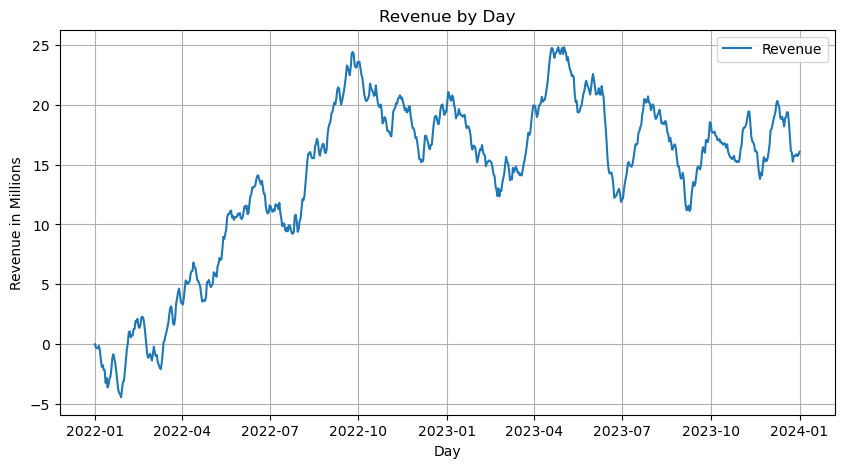

In [368]:
# Display the line graph visualization.

# Size the visual.
plt.figure(figsize=(10, 5))

# Plot the data, days are now the index.
plt.plot(df['Revenue'], label = 'Revenue')

# Fancy labels and tools.
plt.title('Revenue by Day')
plt.xlabel('Day')
plt.ylabel('Revenue in Millions')
plt.legend()
plt.grid(True)

# Display.
plt.show()

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### C2: Time Step Formatting <a name="Time-Step-Formatting"></a>

*Describe the time step formatting of the realization, including any gaps in measurement and length of sequence*.

Realization:
- Formatting:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The '*medical_time_series*' data set measures the daily revenue over a two year span. The data dictionary does not mention a date as to when the two years started. The year 2015 is measured, however it is out of context for the variables in the data set. For this demonstration, the two years starts on January 1st, 2022 without any skips in days.<br /><br />
- Gaps:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are no gaps in the data set, every day in the two year period is represented as seen in the visualization.<br /><br />
- Length of sequence:<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data set covers the first two years of operation, the starting year is not mentioned so 2022 is used as an example. This means 731 data points are mapped for each day between January 1st, 2022 to January 1st, 2024.<br /><br />
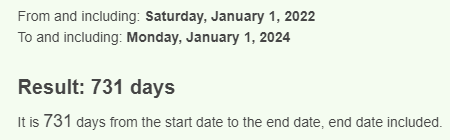<br /><br />
Calculation provided by [timeanddate.com](#timeanddate.com)

<br /><br /><br /><br /><br />

### C3: Stationarity <a name="Stationarity"></a>

*Evaluate the stationarity of the time serries*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The stationarity of the time series can be assessed using the Augmented Dickey-Fuller (ADF) statistical test. The following Python code does this statistical test:

In [369]:
# Assign the result of the test to 'res.'
res = adfuller(df['Revenue'])

In [370]:
# Output the results.
pv = res[1]

# The p-value is assigned to res[1].
print("p-value: " + str(pv))

p-value: 0.1996640061506439


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The series is not stationary as evaluated from the Augmented Dickey-Fulley statistical test, steps will have to be taken in order to make the data stationary. To address this, transformations either exponential, logarithmic or differencing can be applied to stabilize the mean and variance. Using differencing, re-evaluation will be done to confirm the data then meets the requirements for ARIMA.


In [371]:
# Apply differencing.
df_diff = df.copy()
df_diff['Revenue_dot_diff'] = df_diff['Revenue'].diff()

In [372]:
# Drop the null values created by diff.
df_diff = df_diff.dropna()

In [373]:
# Assign the result of the test to 'res_diff.'
res_diff = adfuller(df_diff['Revenue_dot_diff'])

In [374]:
# Output the results.
pv_diff = res_diff[1]

# The p-value is assigned to res_diff[1].
print("p-value: " + str(pv_diff))

p-value: 5.1132069788403175e-30


In [375]:
# Statistical significance.
if pv_diff < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

The series is stationary.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The series is stationary upon differencing and can be evaluated using ARIMA. The following steps breaks this data set into training and testing data sets as needed for modeling.

<br /><br /><br /><br /><br /><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br /><br/><br /><br /><br />

### C4: Steps to Prepare the Data <a name="Steps-to-Prepare-the-Data"></a>

*Explain the steps used to prepare for analysis*.

- Preparing the data set started with visualizing the series between days and revenue where it was both programmatically and visually proven that no values were missing.<br /><br />
- Next, this series was statistically proven as not stationary and required differencing.<br /><br />
- Beginning differencing, since the first value had no past value for difference comparison, it was removed. At this point, there are no missing values in the newly differenced and stationary data set.<br /><br />
- The data set must now be divided into training and testing data sets to develop and evaluate the ARIMA model. For this model the data will be split 80/20% so that the model is trained on data it hadn't seen yet. This split (80/20) is a normal split among model training and testing for different model purposes as well. The following Python code splits the provided '*medical_time_series*' data set into the training and test sets as mentioned.

In [376]:
# Create the training/test point reference split.
splitting_point = int(len(df_diff['Revenue_dot_diff']) * 0.80)

# Create training set.
training_set = df_diff['Revenue_dot_diff'][:splitting_point]

# Create testing set.
testing_set = df_diff['Revenue_dot_diff'][splitting_point:]

In [377]:
print("Training set size: " + str(training_set.size))
print("Testing set size: " + str(testing_set.size))
print("Size of DataFrame: " + str(len(df_diff)))
print("Training + Test size: " + str(training_set.size + testing_set.size) )

Training set size: 584
Testing set size: 146
Size of DataFrame: 730
Training + Test size: 730


<br /><br /><br /><br />

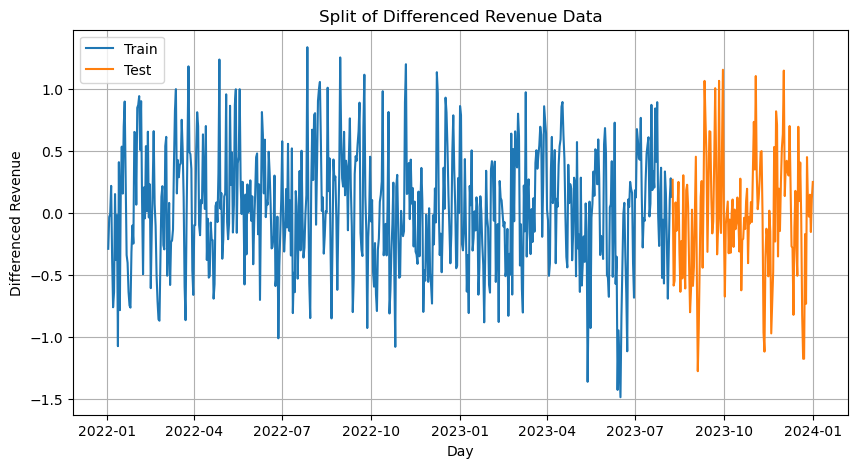

In [378]:
# Visualize the data after split.

# After.
plt.figure(figsize=(10,5))
plt.plot(training_set, label='Train')
plt.plot(testing_set, label='Test')
plt.title('Split of Differenced Revenue Data')
plt.xlabel('Day')
plt.ylabel('Differenced Revenue')
plt.grid(True)
plt.legend()
plt.show()

<br /><br /><br /><br /><br /><br />

### C5: Prepared Data Set <a name="Prepared-Data-Set"></a>

*Provide a prepared, cleaned data set.*

In [379]:
# Exporting cleaned training data set.
training_set.to_csv('training_medical_time_series.csv')

# Exporting cleaned testing data set.
testing_set.to_csv('testing_medical_time_series.csv')

## Model Identification and Analysis <a name="Model-Identification-and-Analysis"></a>

### D1: Report Findings and Visualizations <a name="Report-Findings-and-Visualizations"></a>

*Report the annotated findings with visualizations of the data analysis.*

The Presence or Lack of a Seasonal Component:

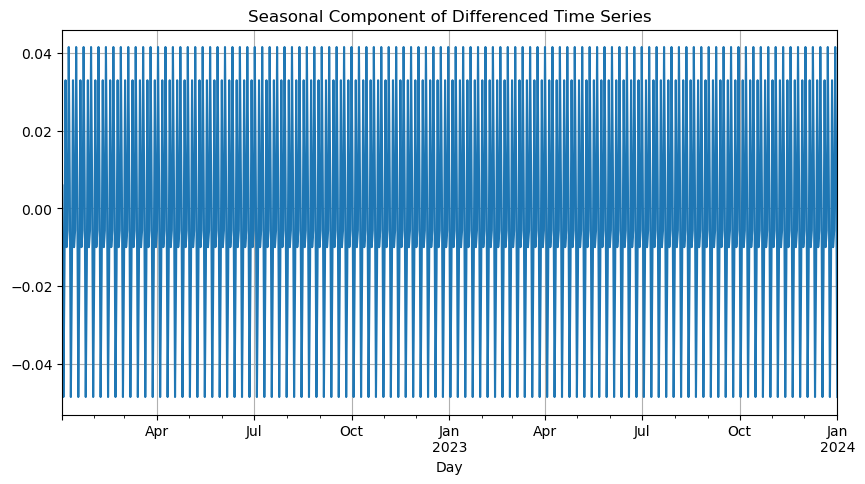

In [380]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Result of seasonal decompose of differenced DataFrame.
res_diff = seasonal_decompose(df_diff['Revenue_dot_diff'])

# Plot results.
res_diff.seasonal.plot(title = "Seasonal Component of Differenced Time Series")
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This plot has a repetitive visual pattern from January 2022 to January 2024. The pattern indicates the existance of seasonal presence through out the differenced data set over the two years.

<br /><br /><br />

Trends:

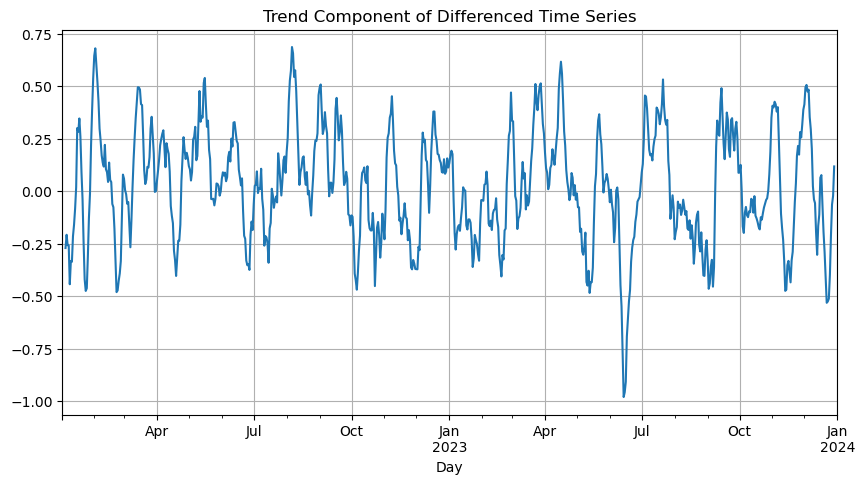

In [381]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
res_diff.trend.plot(title = "Trend Component of Differenced Time Series")
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The trend components showcases considerable variability over the two years in the data set. There does not appear to be a long term trend in either direction which is ideal compared to the non differenced data set.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

The Autocorrelation Function:

<Figure size 1000x500 with 0 Axes>

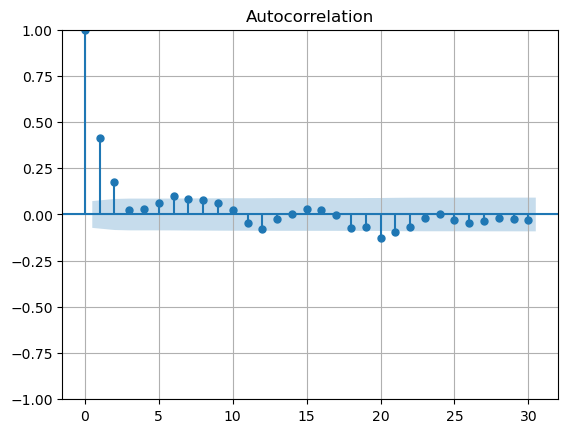

In [382]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
plot_acf(df_diff['Revenue_dot_diff'], lags = 30)
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The autocorrelation function starts of as expected at lag 0 and significantly drops off at lag 1. Since the autocorrelation is strong still at lag 1, the ARIMA model will use this for the model paramaters.

<br /><br /><br /><br /><br /><br /><br /><br />

The Spectral Density:

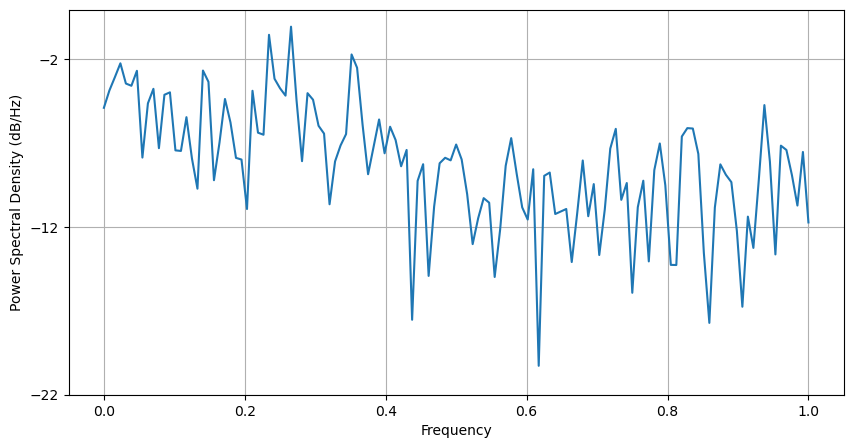

In [383]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
plt.psd(df_diff['Revenue_dot_diff'])
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The power is slightly higher at lower frequencies before declining. The multiple peaks as seen suggest the data's variance is high.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

The Decomposed Time Series:

<Figure size 1000x500 with 0 Axes>

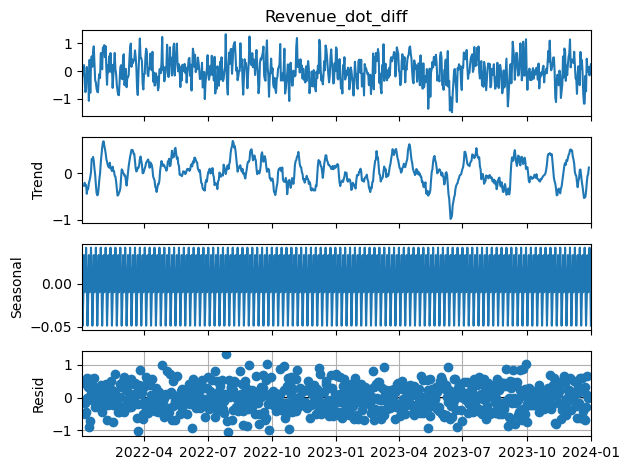

In [384]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

# Plot results.
res_diff.plot()
plt.grid(True)
plt.show()

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

Confirmation of the Lack of Trends in the Residuals of the Decomposed Series:

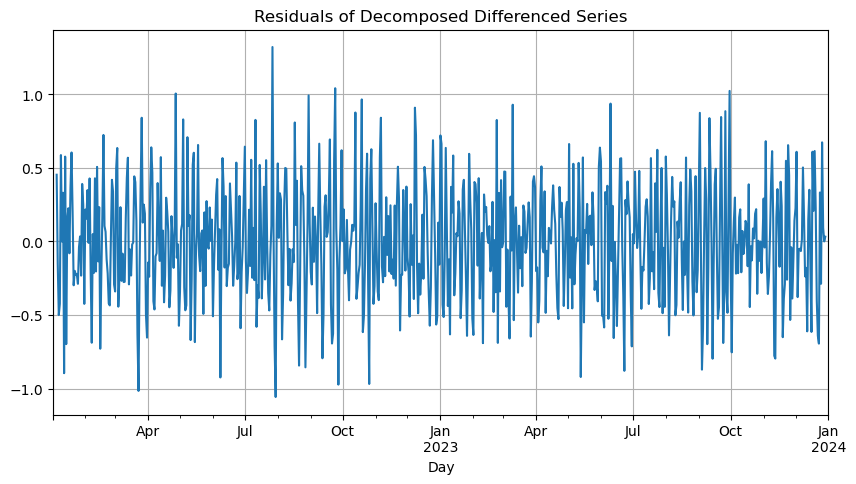

In [385]:
# Figure size for all 6 measures.
plt.figure(figsize=(10, 5))

res_diff.resid.plot(title="Residuals of Decomposed Differenced Series")
plt.grid(True)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There is no trend of the residuals in the decomposed time series.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

### D2: ARIMA Model <a name="ARIMA-Model"></a>

*Identify an ARIMA model that accounts for the observed trend and seasonality of the time series data*.

In [386]:
# Create instance of ARIMA model based on AR(1), is stationary and no moving avg (0, 0)
mod = ARIMA(training_set, order = (1, 0, 0), freq = 'D')

# Assign the results.
res = mod.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [387]:
# Summary of the model.
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:       Revenue_dot_diff   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -350.349
Date:                Sun, 09 Jun 2024   AIC                            706.698
Time:                        21:00:17   BIC                            719.808
Sample:                    01-02-2022   HQIC                           711.808
                         - 08-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.031      1.063      0.288      -0.028       0.093
ar.L1          0.4079      0.038     10.748      0.000       0.333       0.482
sigma2         0.1943      0.012     15.948      0.0

### D3: Forecasting using ARIMA Model <a name="Forecasting-using-ARIMA-Model"></a>

*Provide an accurate forecast using the ARIMA model*.

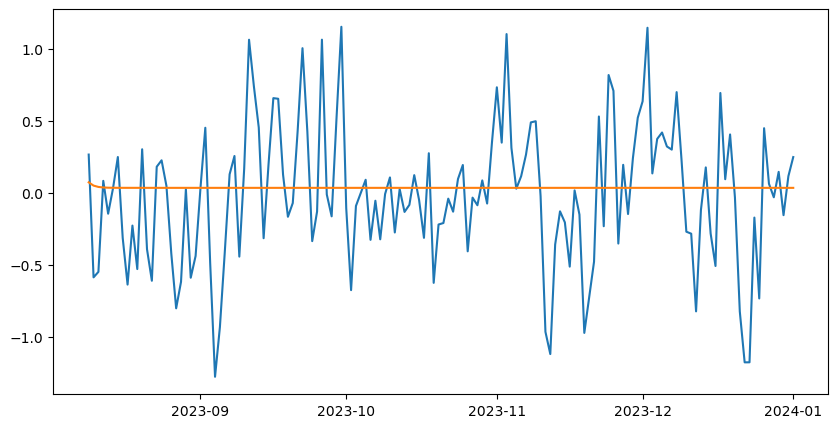

In [388]:
# Use size of plot used for other visuals.
plt.figure(figsize=(10, 5))

# Create forecast as a prediction of fit model.
forecast = res.get_prediction(start = training_set.size, end = (training_set.size + testing_set.size) - 1)

# Plot the testing set.
plt.plot(testing_set)

# Plot the mean of the testing set.
plt.plot(forecast.predicted_mean)

In [389]:
# Get the forecast results from the testing set.
f_res = res.get_forecast(steps=len(testing_set))

# Get the forecast values.
f_val = f_res.predicted_mean

# Get the confidence intervals.
conf_inv = f_res.conf_int()

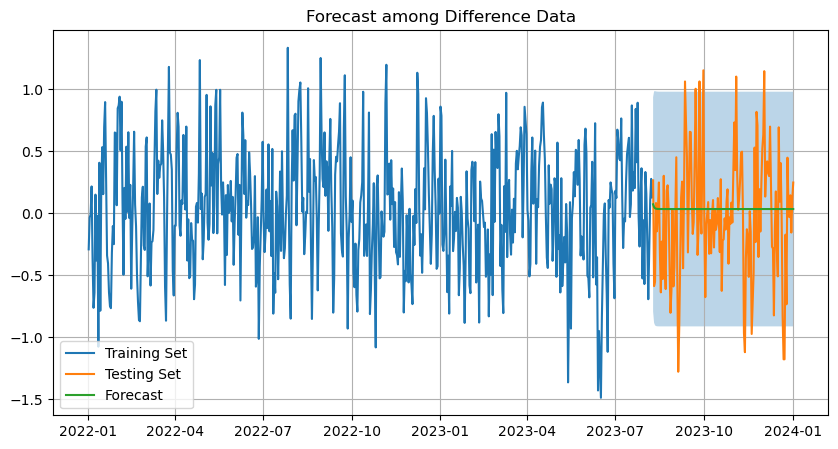

In [390]:
# Use size of plot used for other visuals.
plt.figure(figsize=(10, 5))

# Plot training, testing and forecasted data.
plt.plot(training_set.index, training_set, label = 'Training Set')
plt.plot(testing_set.index, testing_set, label = 'Testing Set')
plt.plot(testing_set.index, f_val, label = 'Forecast')
plt.fill_between(testing_set.index, conf_inv.iloc[:, 0], conf_inv.iloc[:, 1], alpha = 0.3)

# Visual enhance.
plt.title('Forecast among Difference Data')
plt.legend()
plt.grid(True)
plt.show()

In [394]:
# Store the last value.
Y_z = df.iloc[-1]['Revenue']

# Print the last value.
print("Last value: " + str(Y_z))

# Cumilsum the diff forecasted with the original last value.
f_diff = np.concatenate([[Y_z], f_val])
cs_fore = np.cumsum(f_diff)
cs_fore = cs_fore[1:]

print(cs_fore)

Last value: 16.06942948
[16.14050089 16.1889054  16.22806465 16.26345301 16.29730332 16.33052629
 16.36349338 16.39635611 16.42917628 16.46197908 16.4947748  16.52756764
 16.56035929 16.59315047 16.62594144 16.65873234 16.69152321 16.72431406
 16.75710491 16.78989575 16.82268659 16.85547744 16.88826828 16.92105912
 16.95384997 16.98664081 17.01943165 17.0522225  17.08501334 17.11780418
 17.15059503 17.18338587 17.21617671 17.24896756 17.2817584  17.31454924
 17.34734008 17.38013093 17.41292177 17.44571261 17.47850346 17.5112943
 17.54408514 17.57687599 17.60966683 17.64245767 17.67524852 17.70803936
 17.7408302  17.77362105 17.80641189 17.83920273 17.87199357 17.90478442
 17.93757526 17.9703661  18.00315695 18.03594779 18.06873863 18.10152948
 18.13432032 18.16711116 18.19990201 18.23269285 18.26548369 18.29827454
 18.33106538 18.36385622 18.39664706 18.42943791 18.46222875 18.49501959
 18.52781044 18.56060128 18.59339212 18.62618297 18.65897381 18.69176465
 18.7245555  18.75734634 18.

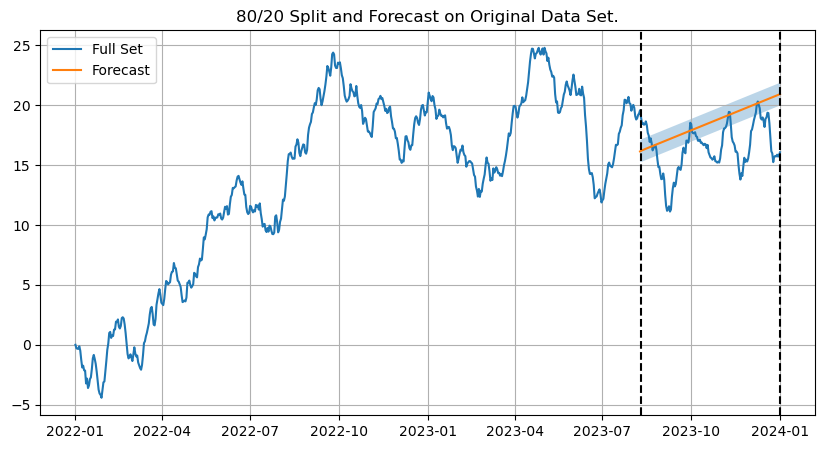

In [434]:
# Use size of plot used for other visuals.
plt.figure(figsize=(10, 5))

z_score = 1.96

# Plot the data set before, testing set and forecast.
plt.plot(df.index, df, label = 'Full Set')
plt.plot(testing_set.index, cs_fore, label = 'Forecast')
plt.fill_between(
    testing_set.index,
    cs_fore - z_score * f_res.se_mean,
    cs_fore + z_score * f_res.se_mean,
    alpha = 0.3
)
plt.axvline(x = 19579, color = 'black', linestyle = '--')
plt.axvline(x = 19723, color = 'black', linestyle = '--')
plt.title('80/20 Split and Forecast on Original Data Set.')
plt.legend()
plt.grid(True)
plt.show()

The 20% of the full set, the testing data is between the marked bars.

### D4: Output and Calculations <a name="Output-and-Calculations"></a>

*Provide all the complete and accurate output and calculations of the analysis*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The remaining output and calculations is the formula for the forecast. All other output and calculations can be found starting at D1, Report Findings and Visualizations.<br /><br />
${X}_{t} = 0.4079 * X_{t-1} + 0.0194 + a_t$ <br /><br />
Where:<br />
$X_t$ is the value of the series for a given time, $t$.<br />
$X_{t-1}$ is the coefficient for the first lag.<br />
$a_t$ is the white noise term.

### D5: Code <a name="Code"></a>

*Provide  the code used to support the implementation of the time series model*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The code has been done starting at C1. Providing the same information twice would likely prove to be redundant. Please refer to the Python code from above.

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

## Attachments <a name="Attachments"></a>

### E: Panopto Recording <a name="Panopto-Recording"></a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=858a1361-f5e8-41cb-b73b-b183017dfb75

### F: Sources for Third-Party Code <a name="Sources-for-Third--Party-Code"></a>

DataCamp Course Resource.

### G: Sources <a name="Sources"></a>

DataCamp Course Resouce.<br /><br />
Overload, D. (Ed.). (2023, March 9). Market Basket Analysis: Techniques, Applications, and Benefits for Retailers. Medium. https://medium.com/@data-overload/market-basket-analysis-techniques-applications-and-benefits-for-retailers-d66eed1f917e 